In [27]:
import pandas as pd
pd.set_option('display.max_rows', None)
file_path_bid = '/Users/gali/Desktop/dsmp-2024-group15/Python files/SARIMAX april/sarima_pred_bid.csv'
file_path_ask = '/Users/gali/Desktop/dsmp-2024-group15/Python files/SARIMAX april/sarima_pred_ask.csv'


Experiment 4: Moving Average Crossover
This strategy involves using short-term and long-term moving averages. A buy signal is typically generated when the short-term moving average crosses above the long-term moving average, indicating a potential upward trend. Conversely, a sell signal is triggered when the short-term moving average crosses below.

In [9]:
predictions_bid = pd.read_csv(file_path_bid,index_col = 0)
predictions_bid = predictions_bid.rename_axis('time')
predictions_bid

,predicted_mean
time,
2025-02-05 10:00:00,134.958636
2025-02-05 11:00:00,134.815213
2025-02-05 12:00:00,135.153222
2025-02-05 13:00:00,134.345741
2025-02-05 14:00:00,133.791349
...,...
2025-02-14 02:00:00,100.490878
2025-02-14 03:00:00,99.586305
2025-02-14 04:00:00,99.180140


In [7]:
predictions_ask = pd.read_csv(file_path_ask,index_col = 0)
predictions_ask = predictions_ask.rename_axis('time')
predictions_ask

,predicted_mean
time,
2025-02-05 10:00:00,135.615172
2025-02-05 11:00:00,135.551537
2025-02-05 12:00:00,135.296503
2025-02-05 13:00:00,135.425311
2025-02-05 14:00:00,135.066030
...,...
2025-02-14 02:00:00,95.838347
2025-02-14 03:00:00,95.365443
2025-02-14 04:00:00,95.012624


In [15]:
merged_df = pd.merge(predictions_bid, predictions_ask, left_index=True, right_index=True, how='inner')

merged_df = merged_df.dropna()
merged_df['price'] = merged_df[['predicted_mean_x', 'predicted_mean_y']].mean(axis=1)
merged_df

,predicted_mean_x,predicted_mean_y,price
time,,,
2025-02-05 10:00:00,134.958636,135.615172,135.286904
2025-02-05 11:00:00,134.815213,135.551537,135.183375
2025-02-05 12:00:00,135.153222,135.296503,135.224863
2025-02-05 13:00:00,134.345741,135.425311,134.885526
2025-02-05 14:00:00,133.791349,135.066030,134.428689
...,...,...,...
2025-02-14 02:00:00,100.490878,95.838347,98.164613
2025-02-14 03:00:00,99.586305,95.365443,97.475874
2025-02-14 04:00:00,99.180140,95.012624,97.096382


In [16]:
file_path_bid = '/Users/gali/Desktop/dsmp-2024-group15/Python files/SARIMAX april/sarima_pred_bid.csv'
bid = pd.read_csv(file_path_bid,index_col = 0)
bid = bid.rename_axis('time')
bid

,predicted_mean
2025-02-05 10:00:00,134.958636
2025-02-05 11:00:00,134.815213
2025-02-05 12:00:00,135.153222
2025-02-05 13:00:00,134.345741
2025-02-05 14:00:00,133.791349
...,...
2025-02-14 02:00:00,100.490878
2025-02-14 03:00:00,99.586305
2025-02-14 04:00:00,99.180140
2025-02-14 05:00:00,99.608748


In [17]:
file_path_ask = '/Users/gali/Desktop/dsmp-2024-group15/Python files/SARIMAX april/sarima_pred_ask.csv'
ask = pd.read_csv(file_path_ask,index_col = 0)
ask = ask.rename_axis('time')
ask

,predicted_mean
time,
2025-02-05 10:00:00,135.615172
2025-02-05 11:00:00,135.551537
2025-02-05 12:00:00,135.296503
2025-02-05 13:00:00,135.425311
2025-02-05 14:00:00,135.066030
...,...
2025-02-14 02:00:00,95.838347
2025-02-14 03:00:00,95.365443
2025-02-14 04:00:00,95.012624


In [ ]:
actual = pd.merge(bid, ask, left_index=True, right_index=True, how='inner')

actual = actual.dropna()
actual['price'] = actual[['predicted_mean_x', 'predicted_mean_y']].mean(axis=1)


In [21]:
sim = merged_df['price']
act = actual['price']
predictions_df = pd.merge(sim, act, left_index=True, right_index=True, how='inner')
predictions_df = predictions_df.dropna()
predictions_df = predictions_df.rename(columns={'price_x': 'Pred_price'})
predictions_df = predictions_df.rename(columns={'price_y': 'price'})
predictions_df

,Pred_price,price
time,,
2025-02-05 10:00:00,135.286904,135.286904
2025-02-05 11:00:00,135.183375,135.183375
2025-02-05 12:00:00,135.224863,135.224863
2025-02-05 13:00:00,134.885526,134.885526
2025-02-05 14:00:00,134.428689,134.428689
...,...,...
2025-02-14 02:00:00,98.164613,98.164613
2025-02-14 03:00:00,97.475874,97.475874
2025-02-14 04:00:00,97.096382,97.096382


In [28]:


# Calculate moving averages
predictions_df['short_ma'] = predictions_df['Pred_price'].rolling(window=5).mean()  # 5-period moving average
predictions_df['long_ma'] = predictions_df['Pred_price'].rolling(window=20).mean()  # 20-period moving average

# Generate signals
predictions_df['Signal'] = 0
predictions_df.loc[predictions_df['short_ma'] > predictions_df['long_ma'], 'Signal'] = 1
predictions_df.loc[predictions_df['short_ma'] < predictions_df['long_ma'], 'Signal'] = -1
print(predictions_df['Signal'])

time
2025-02-05 10:00:00    0
2025-02-05 11:00:00    0
2025-02-05 12:00:00    0
2025-02-05 13:00:00    0
2025-02-05 14:00:00    0
2025-02-05 15:00:00    0
2025-02-05 16:00:00    0
2025-02-05 17:00:00    0
2025-02-05 18:00:00    0
2025-02-05 19:00:00    0
2025-02-05 20:00:00    0
2025-02-05 21:00:00    0
2025-02-05 22:00:00    0
2025-02-05 23:00:00    0
2025-02-06 00:00:00    0
2025-02-06 01:00:00    0
2025-02-06 02:00:00    0
2025-02-06 03:00:00    0
2025-02-06 04:00:00    0
2025-02-06 05:00:00   -1
2025-02-06 06:00:00   -1
2025-02-06 07:00:00   -1
2025-02-06 08:00:00   -1
2025-02-06 09:00:00   -1
2025-02-06 10:00:00   -1
2025-02-06 11:00:00   -1
2025-02-06 12:00:00   -1
2025-02-06 13:00:00   -1
2025-02-06 14:00:00   -1
2025-02-06 15:00:00   -1
2025-02-06 16:00:00   -1
2025-02-06 17:00:00   -1
2025-02-06 18:00:00   -1
2025-02-06 19:00:00   -1
2025-02-06 20:00:00   -1
2025-02-06 21:00:00   -1
2025-02-06 22:00:00   -1
2025-02-06 23:00:00   -1
2025-02-07 00:00:00   -1
2025-02-07 01:00:00 

In [23]:
def simulate_trading(df, initial_capital):
    cash = initial_capital
    holdings = 0
    portfolio_values = []

    # Assume the price to use for trading is the predicted price
    for index, row in df.iterrows():
        if row['Signal'] == 1 and cash > 0:  # Buy
            holdings = cash / row['price']  # Buy as much as possible
            cash = 0
        elif row['Signal'] == -1 and holdings > 0:  # Sell
            cash = holdings * row['price']
            holdings = 0
        
        # Update portfolio value for each step
        portfolio_value = cash + holdings * row['price']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

# Starting capital for the simulation
initial_capital = 10000  # Adjust as necessary

# Run the trading simulation
predictions_df = simulate_trading(predictions_df, initial_capital)


In [24]:
def calculate_profit(df, initial_capital):
    final_portfolio_value = df['Portfolio_Value'].iloc[-1]
    profit = final_portfolio_value - initial_capital
    return profit

# Calculate the profit
profit = calculate_profit(predictions_df, initial_capital)
print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value: ${predictions_df['Portfolio_Value'].iloc[-1]:.2f}")
print(f"Profit or Loss: ${profit:.2f}")


Initial Capital: $10000
Final Portfolio Value: $10000.00
Profit or Loss: $0.00


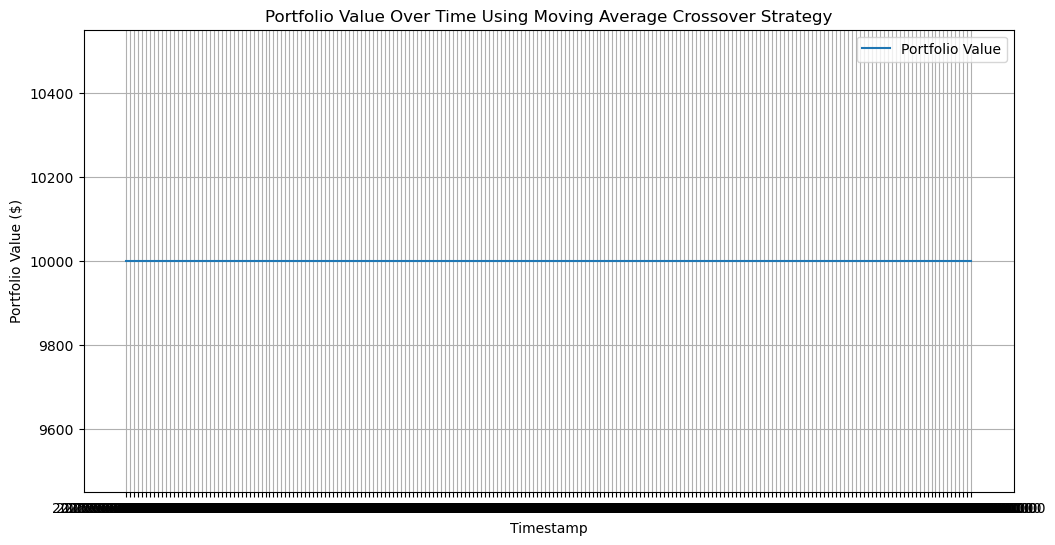

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Portfolio_Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time Using Moving Average Crossover Strategy')
plt.xlabel('Timestamp')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()
